# ステップ応答とボード線図

Pythoで制御工学するときに使う関数とかグラフとか
[Ploty](https://plotly.com/python/)でグラフ描画

## パッケージのインポート

In [1]:
from control.matlab import *
import numpy as np
import plotly

## 伝達関数の定義

In [2]:
P = tf([0, 1], [0.5, 1])
P

TransferFunction(array([1]), array([0.5, 1. ]))

In [3]:
y, t  = step(P, np.arange(0, 5, 0.01))
gain, phase, w = bode(P, logspace(-2, 2), plot = False)
stepinfo(P)

{'RiseTime': 1.059189142777261,
 'SettlingTime': 1.7499646706754748,
 'SettlingMin': 0.8952871451949115,
 'SettlingMax': 0.9895287145194934,
 'Overshoot': 0.0,
 'Undershoot': 0.0,
 'Peak': 0.9895287145194934,
 'PeakTime': 2.2795592420641055,
 'SteadyStateValue': 0.9895287145194934}

## ステップ応答

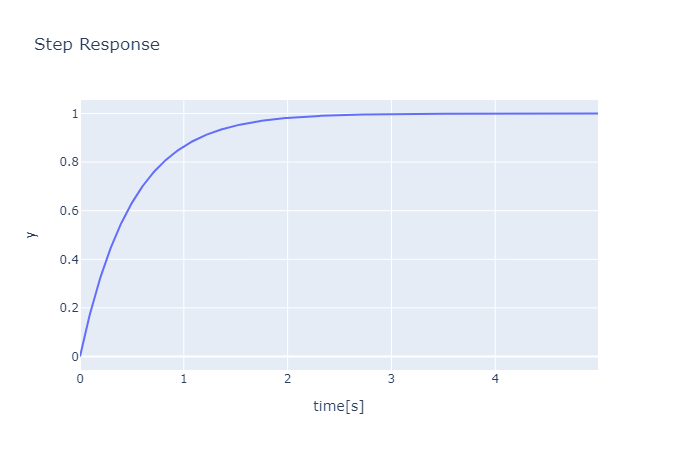

In [6]:
data_step = [
    plotly.graph_objects.Scatter(x=t, y=y, name="P")
]
layout_step = plotly.graph_objs.Layout(
    title="Step Response",
    legend={"x":0.8, "y":0.8},
    xaxis={"title":"time[s]"},
    yaxis={"title":"y"},
)
fig_step = plotly.graph_objs.Figure(data=data_step, layout=layout_step)

plotly.offline.iplot(fig_step)

## ボード線図

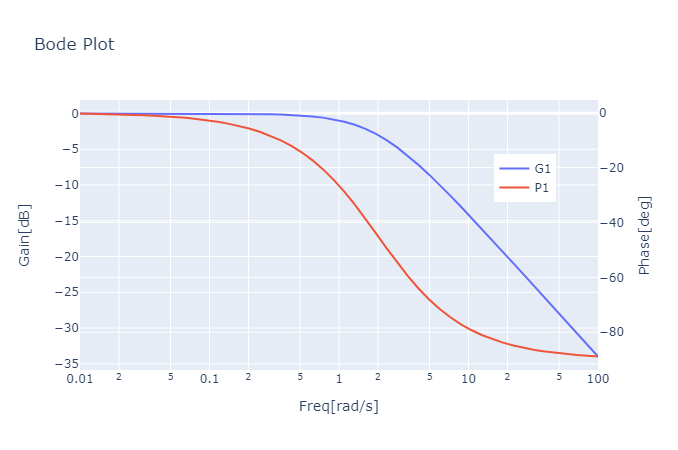

In [7]:
data_bode = [
    plotly.graph_objects.Scatter(x=w, y=20*np.log10(gain), name="G1"),
    plotly.graph_objects.Scatter(x=w, y=phase*180/np.pi, name="P1", yaxis='y2'),
]
layout_bode = plotly.graph_objs.Layout(
    title="Bode Plot",
    legend={"x":0.8, "y":0.8},
    xaxis={"title":"Freq[rad/s]"},
    yaxis={"title":"Gain[dB]"},
    yaxis2={"title":"Phase[deg]", "overlaying":"y", "side":"right"},

)
fig_bode = plotly.graph_objs.Figure(data=data_bode, layout=layout_bode)
fig_bode.update_xaxes(type="log")
plotly.offline.iplot(fig_bode)